In [15]:
# Install dependensi yang dibutuhkan
!pip install scikit-learn mglearn

# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
from google.colab import files


In [16]:
# Upload file
uploaded = files.upload()

# Load dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Cek struktur data
df.info()
df.head()

Saving CitarumWater.csv to CitarumWater (12).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   object 
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


In [17]:
# Drop kolom yang tidak relevan
df_cleaned = df.drop(columns=["No", "NamaSungai", "TitikPantau", "Waktu", "Temp", "O2"])

# Pisahkan fitur dan target
X = df_cleaned.drop(columns=["Class"])
y = df_cleaned["Class"]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inisialisasi model Logistic Regression
model = LogisticRegression(max_iter=500)

In [18]:
# Training model
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [21]:
# Prediksi pada data uji
y_pred = model.predict(X_test)
y_prob_multi = model.predict_proba(X_test)  # Probabilitas untuk semua kelas

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
auc = roc_auc_score(y_test, y_prob_multi, multi_class="ovr", average="weighted")
# Cetak hasil evaluasi
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

Akurasi: 0.9580
Presisi: 0.9581
Recall: 0.9580
F1-Score: 0.9579
AUC-ROC: 0.9968


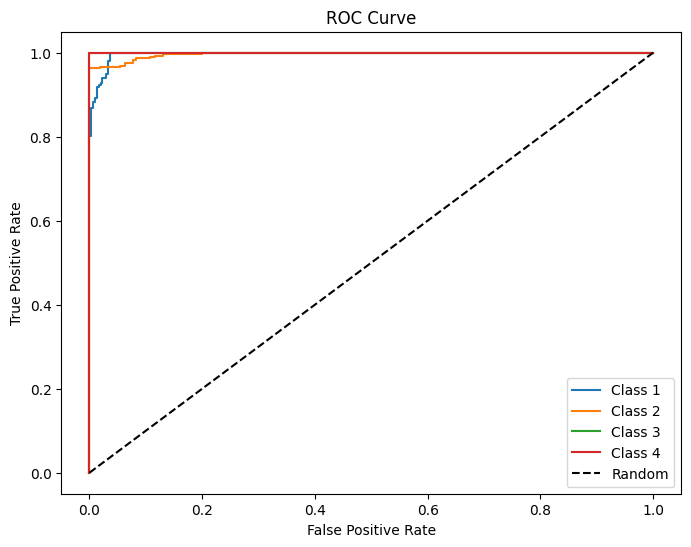

In [22]:
# Plot ROC Curve untuk semua kelas
plt.figure(figsize=(8, 6))

for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == model.classes_[i], y_prob_multi[:, i])
    plt.plot(fpr, tpr, label=f'Class {model.classes_[i]}')

plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## 1. Standardisasi Data  
Sebelum melatih model, data fitur \( X \) harus **distandardisasi** menggunakan **StandardScaler** yang mentransformasi setiap fitur menjadi distribusi dengan **mean 0** dan **standar deviasi 1**:  

$$
X' = \frac{X - \mu}{\sigma}
$$

Dimana:  
- \( X \) adalah nilai asli dari fitur  
- \( \mu \) adalah **mean** dari fitur  
- \( \sigma \) adalah **standar deviasi** dari fitur  

---

## 2. Model Logistic Regression  
Regresi logistik digunakan untuk **klasifikasi**, bukan regresi numerik. Model ini menghitung probabilitas suatu sampel \( X \) masuk ke kelas tertentu menggunakan **fungsi sigmoid**:  

$$
P(y=1|X) = \sigma(wX + b)
$$

Dimana:  
- \( \sigma(z) = \frac{1}{1 + e^{-z}} \) adalah **fungsi sigmoid**  
- \( w \) adalah **vektor bobot**  
- \( X \) adalah **vektor fitur input**  
- \( b \) adalah **bias**  

Untuk **multi-class classification**, digunakan **softmax function**:  

$$
P(y = k | X) = \frac{e^{w_k^T X}}{\sum_{j=1}^{K} e^{w_j^T X}}
$$

Dimana \( K \) adalah jumlah kelas.  

---

## 3. Evaluasi Model  
Beberapa metrik digunakan untuk menilai performa model:

### a. Akurasi  
Akurasi dihitung sebagai jumlah prediksi benar dibandingkan total data:  

$$
\text{Akurasi} = \frac{\text{Jumlah Prediksi Benar}}{\text{Total Data}}
$$

---

### b. Precision  
Precision mengukur seberapa akurat prediksi positif:  

$$
\text{Precision} = \frac{\text{True Positives (TP)}}{\text{TP} + \text{False Positives (FP)}}
$$

---

### c. Recall (Sensitivity)  
Recall mengukur seberapa banyak kelas positif yang terdeteksi dengan benar:  

$$
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{TP} + \text{False Negatives (FN)}}
$$

---

### d. F1-Score  
F1-Score adalah **harmonic mean** dari Precision dan Recall:  

$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

### e. AUC-ROC (Area Under Curve - Receiver Operating Characteristic)  
AUC-ROC mengukur seberapa baik model membedakan antara kelas positif dan negatif dengan menghitung luas di bawah kurva **ROC Curve**:  

$$
\text{AUC} = \int_{0}^{1} TPR(FPR) \, dFPR
$$

Dimana:  
- **TPR (True Positive Rate) atau Recall**:  

$$
TPR = \frac{TP}{TP + FN}
$$

- **FPR (False Positive Rate)**:  

$$
FPR = \frac{FP}{FP + TN}
$$

Semakin besar nilai **AUC**, semakin baik model dalam membedakan antara kelas.  

---

##  Kesimpulan  
1. Data distandardisasi menggunakan **StandardScaler** agar distribusi lebih baik.  
2. Model **Logistic Regression** digunakan untuk prediksi kelas.  
3. Performa model dievaluasi dengan **Akurasi, Precision, Recall, F1-Score, dan AUC-ROC**.  
4. **ROC Curve** digunakan untuk melihat kemampuan model dalam membedakan kelas positif dan negatif.  
